<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-and-Concatenate-data" data-toc-modified-id="Load-and-Concatenate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load and Concatenate data</a></span></li><li><span><a href="#Duplicated-Entries" data-toc-modified-id="Duplicated-Entries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Duplicated Entries</a></span></li><li><span><a href="#Country" data-toc-modified-id="Country-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Country</a></span></li></ul></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#Missing-Description" data-toc-modified-id="Missing-Description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing Description</a></span></li><li><span><a href="#Missing-Customer-ID" data-toc-modified-id="Missing-Customer-ID-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Customer ID</a></span></li></ul></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical Features</a></span><ul class="toc-item"><li><span><a href="#Price" data-toc-modified-id="Price-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Quantity" data-toc-modified-id="Quantity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Quantity</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Stock-Code-and-Description" data-toc-modified-id="Stock-Code-and-Description-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stock Code and Description</a></span><ul class="toc-item"><li><span><a href="#Unique-Stock-Code-and-Description" data-toc-modified-id="Unique-Stock-Code-and-Description-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Unique Stock Code and Description</a></span></li><li><span><a href="#Same-or-SImilar-Stock-Codes-with-Different-Description" data-toc-modified-id="Same-or-SImilar-Stock-Codes-with-Different-Description-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Same or SImilar Stock Codes with Different Description</a></span></li><li><span><a href="#Same-Description-with-Different-Description" data-toc-modified-id="Same-Description-with-Different-Description-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Same Description with Different Description</a></span></li><li><span><a href="#Abnormal-Stack-Code" data-toc-modified-id="Abnormal-Stack-Code-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Abnormal Stack Code</a></span></li></ul></li><li><span><a href="#Save-Files" data-toc-modified-id="Save-Files-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save Files</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

This [Online Retail II data set](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) contains all the transactions occurring for a UK-based and registered, non-store online retail between 12/01/2009 and 12/09/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

The last part, i.e., stock code and description, can be used for market basket analysis, which was not included in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime
import missingno as msno
import seaborn as sns

## Load Data

There are two sheets in the original excel file covering two different periods, 12/01/2009 through 12/10/2010, and 12/01/2010 through 12/9/2011.

### Load and Concatenate data

In [2]:
# Load two sheets as a dict of DataFrame
file_path = 'RawData/online_retail_II.xlsx'
two_sheets = pd.read_excel(file_path, sheet_name=None)

In [3]:
# Concatenate two sheets
retail = pd.concat(two_sheets, ignore_index=True)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Column Description:

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling.

**Customer ID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

We will check duplicates since there is overlap of the two sheets.

### Duplicated Entries

In [6]:
retail.duplicated().sum()

34335

Totally 32463 entries are duplicated, which will be remove.

In [7]:
# Drop all the duplicates
retail.drop_duplicates(inplace=True)
retail.duplicated().sum()

0

### Country

In [8]:
# Check the top five coutries
retail.Country.value_counts(normalize=True)[:5]

United Kingdom    0.917994
EIRE              0.017102
Germany           0.016785
France            0.013576
Netherlands       0.004973
Name: Country, dtype: float64

The transactions from UK account for the vast majority. For this project, we will focus on UK.

In [9]:
# Keep the transactions from the U.K. only
retail = retail[retail.Country == 'United Kingdom']
retail.Country.unique()

array(['United Kingdom'], dtype=object)

We will remove the country column since it can't provide more information for the following analysis and modeling

In [10]:
# Drop country column
retail.drop('Country', axis=1, inplace=True)
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID'],
      dtype='object')

## Missing Values

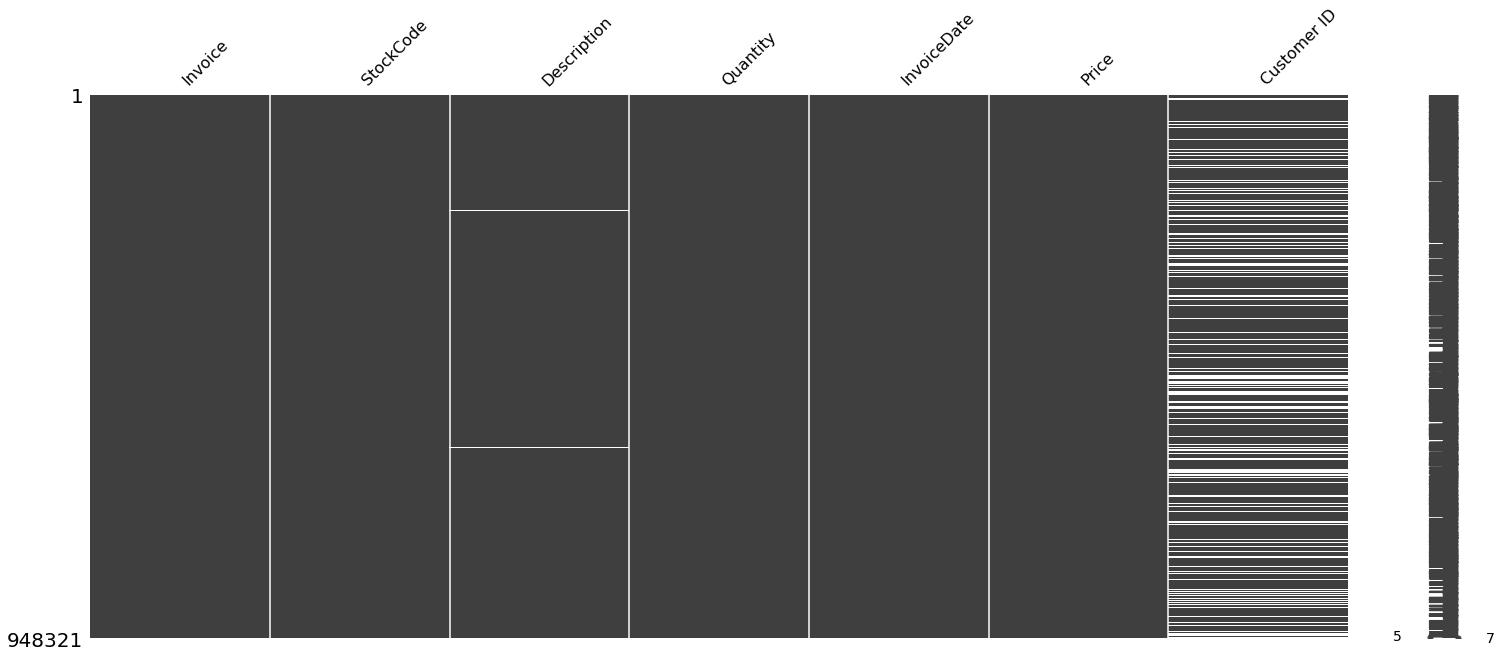

In [11]:
# Missing value distribution
_ = msno.matrix(retail)

In [12]:
def missing_vals(data):
    # Check the number and percentage of missing values
    miss     = data.isnull().sum()
    miss_pct  = data.isnull().sum()/data.shape[0]
    
    miss_pct  = pd.concat([miss, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(3)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols

miss_loans = missing_vals(retail)
miss_loans

,Column Name,Missings,Missing_pct
0,Customer ID,232206,0.245
1,Description,4275,0.005


### Missing Description

In [13]:
retail[retail.Description.isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN
...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN


Some values look weird, such as the negative values in Quantity and the zero price. Only about 0.5% of the transactions have no description, so we will remove all these entries.

In [14]:
# Remove the entries with missing Description
retail = retail[retail.Description.notna()]
retail.Description.isna().sum()

0

### Missing Customer ID

Almost one fourth of the transactions have no Customer ID that is critical to the analysis based on cohort. The distribution of the Customer ID's missing values look random, so temporarily,  we fill missing Customer ID with 0

In [15]:
retail['Customer ID'].fillna(0, inplace=True)

In [16]:
retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64

As we can see, there's a space between "Customer" and "ID", we will remove the space for convenience.

In [17]:
# Remove space
retail.rename(columns = {'Customer ID': 'CustomerID'}, inplace=True)
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID'],
      dtype='object')

## Numerical Features

In [18]:
retail[['Quantity', 'Price']].describe()

,Quantity,Price
count,944046.000000,944046.000000
mean,9.096960,4.514302
std,172.168235,125.825481
min,-80995.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.150000
max,80995.000000,38970.000000


Both quantity and price has negative values. Let's check it.

### Price

In [19]:
# Calculate the percentage of the transactions whose price are less than or equal to 0
retail[retail.Price <= 0].shape[0] / retail.shape[0]

0.0018187673058304363

In [20]:
retail[retail.Price <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,0.0
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,0.0
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,0.0
3168,489663,35605A,damages,-117,2009-12-01 18:02:00,0.0,0.0
...,...,...,...,...,...,...,...
1060797,581213,22576,check,-30,2011-12-07 18:38:00,0.0,0.0
1062371,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,0.0
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,0.0
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,0.0


Less than 0.2% transactions' price is less than or equal to zero. Moreover, most of the description of these transactions look different from a normal transaction. We will remove all these entries.

In [21]:
# Keep the transactions with price more than 0
retail = retail[retail.Price > 0]
retail.Price.describe()

count    942329.000000
mean          4.690915
std          94.265751
min           0.001000
25%           1.250000
50%           2.100000
75%           4.150000
max       38970.000000
Name: Price, dtype: float64

### Quantity

In [22]:
# Calculate the percentage of the transactions whose quantity are less than or equal to 0
retail[retail.Quantity <= 0].shape[0] / retail.shape[0]

0.01728695604189195

In [23]:
retail[retail.Quantity <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0


The Invoice codes of the first and last five entries show that the transactions with negative quantity had been canceled(According to the column description, the code starting with the letter 'c' indicates a cancellation). Here, we will remove the transactions with negative quantity without further exploration since they only account for less than 2% of all the transactions.

In [24]:
# Keep the transactions with quantity more than 0
retail = retail[retail.Quantity > 0]
retail.Quantity.describe()

count    926039.000000
mean          9.921563
std         124.656086
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

### Revenue

In [25]:
# Create revenue column
retail['Revenue'] = retail.Quantity * retail.Price
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,30.0


In [26]:
retail.Revenue.describe()

count    926039.000000
mean         18.801119
std         212.690077
min           0.001000
25%           3.750000
50%           8.850000
75%          17.000000
max      168469.600000
Name: Revenue, dtype: float64

In [27]:
# Check price, quantity, and revenue based on stock code
# Calculate product's average price, total sold quantity, total revenue, and total number of purchase 
product = retail.groupby('StockCode').agg(
    {'Quantity': 'sum', 'Price':'mean', 'Revenue': ['sum', 'count']})
product

Quantity      Price  Revenue      
                  sum       mean      sum count
StockCode                                      
10002            6488   1.006262  5151.71   305
10080             315   0.505000   129.29    28
10109               4   0.420000     1.68     1
10120             622   0.241429   133.92    70
10125            1373   0.948323  1121.08   155
...               ...        ...      ...   ...
gift_0001_40        5  33.218000   166.09     5
gift_0001_50        6  42.265000   253.59     6
gift_0001_70        1  59.570000    59.57     1
gift_0001_80        1  69.560000    69.56     1
m                   5   3.010000    15.05     5

[4906 rows x 4 columns]

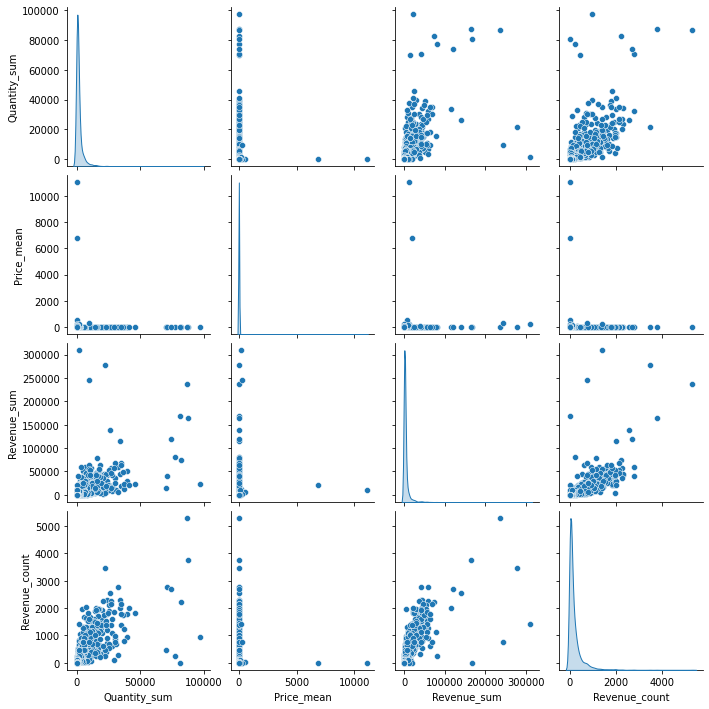

In [28]:
# Flatten the muli-level columns
product.columns = ["_".join(a) for a in product.columns.to_flat_index()]

# Check the distribution 
_ = sns.pairplot(product, diag_kind='kde')

All features are right-skewed. As comparison, We will display the features' distribution after taking logarithm.

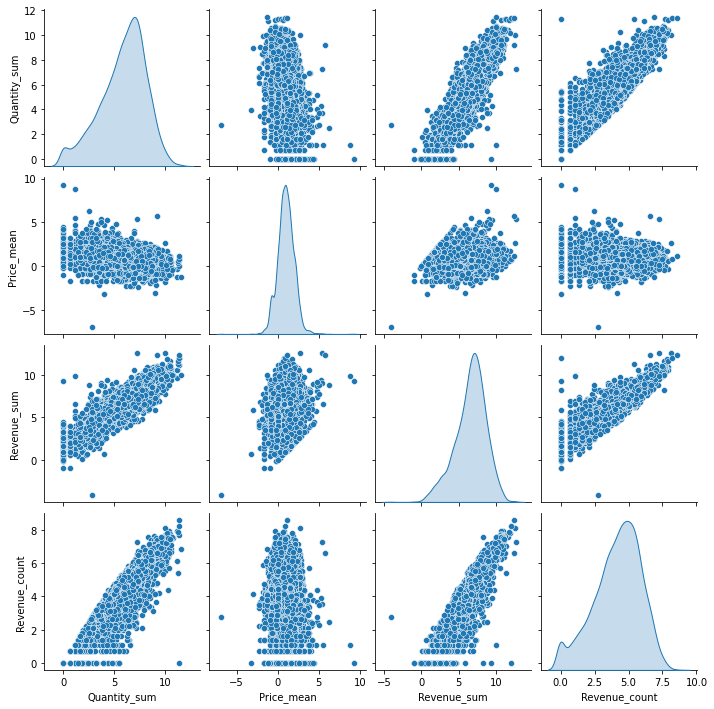

In [29]:
# Take logarithm
log_product = np.log(product)
# The distribution after applying logarithm transformation 
_ = sns.pairplot(log_product, diag_kind='kde')

## Time Series

In [30]:
retail.InvoiceDate

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067350   2011-12-09 12:31:00
1067351   2011-12-09 12:49:00
1067352   2011-12-09 12:49:00
1067353   2011-12-09 12:49:00
1067354   2011-12-09 12:49:00
Name: InvoiceDate, Length: 926039, dtype: datetime64[ns]

For this project, the detailed time of the transactions is unnecessary, so we keep the date only.

In [31]:
# Keep date only
retail = retail[retail.InvoiceDate.dt.date<dt(2011,12,1).date()]
# Check result
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Revenue
1041825,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,5.00
1041826,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,11.90
1041827,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,12.48
1041828,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,7.95
1041829,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444.0,5.95


In [32]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902723 entries, 0 to 1041829
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      902723 non-null  object        
 1   StockCode    902723 non-null  object        
 2   Description  902723 non-null  object        
 3   Quantity     902723 non-null  int64         
 4   InvoiceDate  902723 non-null  datetime64[ns]
 5   Price        902723 non-null  float64       
 6   CustomerID   902723 non-null  float64       
 7   Revenue      902723 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 62.0+ MB


The last day of the dataset 12/09/2011, which means the data of the December 2011 is incomplete. The last month data will be removed such that we can do monthly performance analysis and time based cohort analysis in a right way.

In [33]:
# Keep the data before December 2011
retail = retail[retail.InvoiceDate.dt.date < dt(2011,12,1).date()]
# Check result
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Revenue
1041825,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,5.00
1041826,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,11.90
1041827,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,12.48
1041828,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,7.95
1041829,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444.0,5.95


**The following part can be used for market basket analysis, which was not included in this project**

## Stock Code and Description

In [34]:
retail.StockCode.value_counts()

85123A    5241
85099B    3715
22423     3417
20725     2746
21212     2740
          ... 
21772        1
84614C       1
85043        1
21290        1
23617        1
Name: StockCode, Length: 4905, dtype: int64

In [35]:
retail[retail.StockCode=='22423'].Description.value_counts()

Series([], Name: Description, dtype: int64)

In [36]:
retail[retail.StockCode==22423].Description.value_counts()

REGENCY CAKESTAND 3 TIER    3417
Name: Description, dtype: int64

In [37]:
retail.loc[:, 'StockCode'] = retail.StockCode.apply(lambda x: str(x))

In [38]:
retail.StockCode.dtype

dtype('O')

In [39]:
retail[retail.StockCode=='22423'].Description.value_counts()

REGENCY CAKESTAND 3 TIER    3417
Name: Description, dtype: int64

### Unique Stock Code and Description

In [40]:
# Check the number of unique stock code
retail.StockCode.nunique()

4905

In [41]:
# Check the number of unique description
retail.Description.nunique()

5367

According to the column description, `StockCode` is a 5-digit integral number uniquely assigned to each distinct product (item), and `Description` is product (item) name. Actually, many stock codes contains letters. Besides, the number of unique stock code is less than the number of unique description. Let's take the stock code '85099B' as an example.

### Same or SImilar Stock Codes with Different Description

In [42]:
# Check the description with the same stock code
retail[retail.StockCode=='85099B'].Description.value_counts()

JUMBO BAG RED RETROSPOT        3014
JUMBO BAG RED WHITE SPOTTY      505
RED RETROSPOT JUMBO BAG         196
Name: Description, dtype: int64

In [43]:
# Check the stock codes starting with the same 5-digit number
retail[retail.StockCode.str.startswith('85099')].StockCode.value_counts()

85099B    3715
85099C    1814
85099F    1762
85099b      25
85099f      25
85099c      10
Name: StockCode, dtype: int64

In [44]:
# Compare the description with the same ending letter but different capitalization
# Ending with F
retail[retail.StockCode=='85099F'].Description.value_counts()

JUMBO BAG STRAWBERRY    1762
Name: Description, dtype: int64

In [45]:
# Ending with f
retail[retail.StockCode=='85099f'].Description.value_counts()

JUMBO BAG STRAWBERRY    25
Name: Description, dtype: int64

As we can see, the same stock code may have different description, and the letter-ending stock code may belong to a stock code group where all the codes start with the same 5-digit number and end with different letters(upper case or lower case). In some cases, the products may have the same description but different stock code.

Let's check the stock code with only 5-digit number.

In [46]:
retail[retail.StockCode=='20725'].Description.value_counts()

LUNCH BAG RED RETROSPOT    1628
LUNCH BAG RED SPOTTY       1118
Name: Description, dtype: int64

The same stock code that contains number only may also have different description.

Generally, the different descriptions corresponding to a same special stock code or similar stock codes describe the details of a product, such as color or pattern.

### Same Description with Different Description

In [47]:
# The unique description
unique_des = retail.Description.unique()

# Build a dict to store the description that correspond to more than one stock codes
des_sc = {}
for des in unique_des:
    nunique_sc = retail[retail.Description == des].StockCode.nunique()
    if nunique_sc > 1:
        des_sc[des] = retail[retail.Description == des].StockCode.value_counts().index

len(des_sc)

225

There are totally 225 unique descriptions that have different stock codes. Let's check them in further details.

In [48]:
# Take 20 random samples
pd.DataFrame.from_dict(des_sc, orient='index').sample(20)

,0,1,2,3,4,5
WHITE BIRD GARDEN DESIGN MUG,85160A,85160a,None,None,None,None
3D SHEET OF CAT STICKERS,84559B,84559b,None,None,None,None
RED RETROSPOT UMBRELLA,85014B,85014b,None,None,None,None
DOORMAT BLACK FLOCK,48173C,48173c,None,None,None,None
ENAMEL PINK TEA CONTAINER,35809A,35809a,None,None,None,None
S/4 VALENTINE DECOUPAGE HEART BOX,85184C,85184c,None,None,None,None
SET/6 PURPLE BUTTERFLY T-LIGHTS,72349B,72349b,None,None,None,None
COLUMBIAN CANDLE ROUND,72128,72130,None,None,None,None
BLUE 3 PIECE POLKADOT CUTLERY SET,84997C,84997c,None,None,None,None
S/4 BURGUNDY WINE DINNER CANDLES,72801G,72801g,None,None,None,None


It's seems that most of the descriptions have 2 different stock codes. The major difference is the ending-letter capitalization. There is also difference between the 5-digit numbers.

The number of different stock codes corresponding to the same description is up to 5. 

In [49]:
# Check the description that has more than 2 stock codes.
sc_more_than_2 = {}
for k, v in des_sc.items():
    if len(v) > 2:
        sc_more_than_2[k] = v
sc_more_than_2      

{'COLOURING PENCILS BROWN TUBE': Index(['10135', '10133', '10134'], dtype='object'),
 'METAL SIGN,CUPCAKE SINGLE HOOK': Index(['82613B', '82613C', '82613A', '82613c', '82613b', '82613a'], dtype='object'),
 'WHITE BAMBOO RIBS LAMPSHADE': Index(['40001', '40003', '40002'], dtype='object')}

Only three products have the same description with more than 3 stock codes. 

What we most care about is if the products with same description but different stock codes have special pattern, which may distinguish these products from the others. Let's take a look at the numeric features' statistics.

In [50]:
# Separate the transactions of the products that have the same description and different stock codes
same_des_diff_sc = retail[retail.Description.apply(lambda x: x in list(des_sc.keys()))]

In [51]:
# The size ratio 
same_des_diff_sc.shape[0] / retail.shape[0]

0.06754009812533857

In [52]:
# The numeric features' statistcs
print(same_des_diff_sc[['Quantity','Price']].describe())
print(retail[['Quantity','Price']].describe())

           Quantity         Price
count  60970.000000  60970.000000
mean       9.486239      7.366343
std       41.387369    164.991435
min        1.000000      0.060000
25%        1.000000      1.630000
50%        3.000000      2.950000
75%        8.000000      4.250000
max     4320.000000  25111.090000
            Quantity          Price
count  902723.000000  902723.000000
mean        9.860305       4.014003
std        92.984582      50.206999
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        10.000000       4.150000
max     74215.000000   25111.090000


About 6.7% of the total transactions are related to the products that have the same description but different stock codes. The statistics shows that there's no significant difference between these products and the others. Since stock code and description have no impact on our following cohort, customer life value, and RFM analysis, we will ignore them for now.

But are there any other special stock codes that are not composed with a 5-digit number and/or 1 ending letter?

### Abnormal Stack Code

In [53]:
unique_sc = retail.StockCode.unique()

normal_sc = []
for sc in unique_sc:
    if len(sc) == 5 and sc.isnumeric():
        normal_sc.append(sc)
    elif len(sc) == 6 and sc[:5].isnumeric() and sc[-1].isalpha():
        normal_sc.append(sc)

In [54]:
abnomal_sc_list = [x for x in unique_sc if x not in normal_sc]
abnomal_sc_data = retail[retail.StockCode.apply(lambda x: x in abnomal_sc_list)]
abnomal_sc_data.StockCode.value_counts()

DOT             1399
15056BL          745
M                741
79323LP          160
15056bl           85
POST              79
79323GR           79
C2                58
BANK CHARGES      32
DCGS0058          30
gift_0001_20      26
gift_0001_30      24
DCGSSGIRL         23
DCGSSBOY          20
PADS              16
DCGS0076          14
DCGS0003          13
gift_0001_10      13
ADJUST            12
TEST001            9
gift_0001_50       6
DCGS0069           5
m                  5
D                  5
gift_0001_40       5
DCGS0004           4
ADJUST2            3
S                  3
AMAZONFEE          3
DCGS0072           3
SP1002             2
DCGS0066N          2
DCGS0070           2
DCGS0068           2
DCGS0041           1
gift_0001_70       1
DCGS0037           1
DCGS0075           1
TEST002            1
47503J             1
DCGS0044           1
gift_0001_80       1
DCGS0062           1
B                  1
Name: StockCode, dtype: int64

There are many different stock code patterns that don't follow the naming rule, i.e., containing 5-digit number only or 5-digit number plus one ending letter. 

Let's check the top four stock codes, which are related to more 100 transactions.

In [55]:
# Top four abnormal stock codes
top_4 = abnomal_sc_data.StockCode.value_counts()[:4].index
# Check the description of the four codes
retail[retail.StockCode.apply(lambda x: x in top_4)].groupby('StockCode').Description.unique()

StockCode
15056BL     [EDWARDIAN PARASOL BLACK]
79323LP    [LIGHT PINK CHERRY LIGHTS]
DOT                  [DOTCOM POSTAGE]
M                            [Manual]
Name: Description, dtype: object

'15056BL' and '79323LP' represent normal products, while 'DOT' and 'M' do not.

In [56]:
abnomal_sc_data.shape[0] / retail.shape[0]

0.004030029145153054

There are no more than 0.4% entries with abnormal stack code. To simplify, we will remove all the entries with abnormal stack code.

In [57]:
# Drop all the entries with abnormal code
retail.drop(index=abnomal_sc_data.index, inplace=True)
# Check the result
# 4906 is the original number of unique codes
retail.StockCode.nunique() == 4906 - len(abnomal_sc_list)

False

## Save Files

In [58]:
# The final dataset info
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899085 entries, 0 to 1041829
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      899085 non-null  object        
 1   StockCode    899085 non-null  object        
 2   Description  899085 non-null  object        
 3   Quantity     899085 non-null  int64         
 4   InvoiceDate  899085 non-null  datetime64[ns]
 5   Price        899085 non-null  float64       
 6   CustomerID   899085 non-null  float64       
 7   Revenue      899085 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 61.7+ MB


In [60]:
# Save the processed data and rename the dateset
filepath = 'ProcessedData/retail_df.csv'
retail.to_csv(filepath, index=False, date_format='%Y-%m-%d')

## Summary

The on-line retail dataset is pretty clean. Several steps have been taken as followed:
* Removed the transactions outside the UK
* Removed all the transactions without description
* Labeled the missing Customer ID as 0
* Removed all the transactions happening before 12/01/2011
* Removed all the transactions, of which quantity and price are negative or zero
* Removed the detailed time information of transactions and kept the transaction date only
* Explored the numeric values, including price, product quantity, and revenue, all of which are right-skewed.
* Explored the products that have the same or similar stock codes and different description or have the same description different stack codes.